In [2]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [23]:
df = pd.read_excel('Health Facility Coordinates Makoni.xlsx')

In [24]:
makoni = gpd.read_file(r'C:\Users\Ophid\OneDrive - OPHID\Desktop\Pandas_try\Maps\ZIM-3-3_boundaries.shp')

In [25]:
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [26]:
makoni_sites=gpd.GeoDataFrame(df, geometry=points)
makoni_sites.crs = {'init':'epsg:4326'}

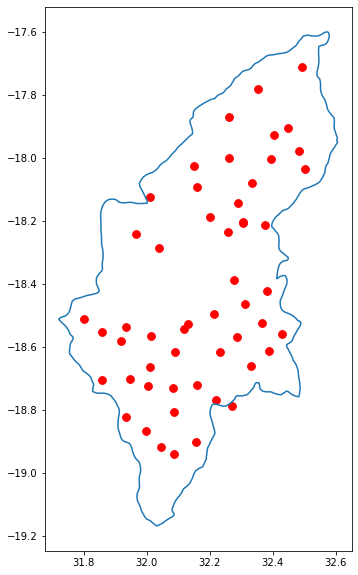

In [9]:
makoni_sites.plot(ax=makoni.plot(figsize=(15,10)), color='r', markersize=60.0)

Text(0.5, 1.0, 'Makoni Q3 Viral Load Coverage')

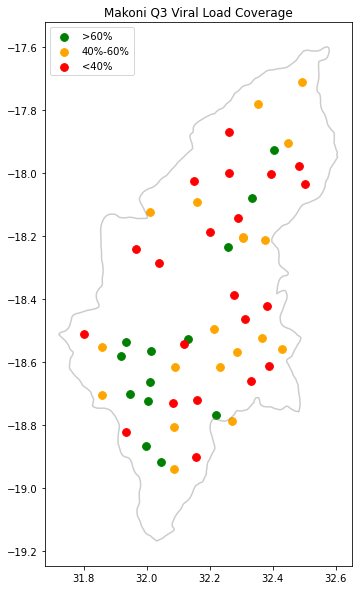

In [38]:
fig, ax = plt.subplots(figsize = (10, 10))
makoni.plot(ax = ax, alpha = 0.4, color = "grey")
makoni_sites[makoni_sites['vl_cov'] >= 60].plot( 
            ax = ax,     
            markersize = 60, 
            color = "green", 
            marker = 'o', 
            label = ">60%" 
)

makoni_sites[makoni_sites['vl_cov'].between(40,60)].plot( 
            ax = ax,     
            markersize = 60, 
            color = "orange", 
            marker = 'o', 
            label = "40%-60%" 
)

makoni_sites[makoni_sites['vl_cov'] <40].plot( 
            ax = ax,     
            markersize = 60, 
            color = "red", 
            marker = 'o', 
            label = "<40%" 
)

plt.legend(loc='upper left')
plt.title('Makoni Q3 Viral Load Coverage')

In [15]:
long = 32.130346
lat = -18.527485

In [16]:
mak_map = folium.Map(location = [lat, long], zoom_start=10)

In [33]:
site_names = folium.map.FeatureGroup()
latitudes = list(makoni_sites.Latitude)
longitudes = list(makoni_sites.Longitude)
labels = list(makoni_sites.Facility)
coverage=list(makoni_sites.vl_cov)
for lat, lng, label, cov in zip(latitudes, longitudes, labels, coverage):
    if cov >=60:
        folium.Marker(location = [lat, lng], popup = label,
        icon = folium.Icon(color='green', icon='info-sign')
        ).add_to(mak_map)
    if cov > 40 and cov <60:
        folium.Marker(location = [lat, lng], popup = label,
        icon = folium.Icon(color='orange', icon='info-sign')
        ).add_to(mak_map)
    if cov < 40:
        folium.Marker(location = [lat, lng], popup = label,
        icon = folium.Icon(color='red', icon='info-sign')
        ).add_to(mak_map)

In [34]:
mak_map.add_child(site_names)
mak_map